# Avacado Project

# Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.



# Content:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

Your task is to make a mode that can consider the data provided and predict the Average Price.

# Import Libraries



In [1]:
# Data Analysis and Data Wrangling
import pandas as pd
import numpy as np

# Data Visulaziation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the avocado data set

avocado_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')

# Featured Engineering

# Data Processing 

In [3]:
avocado_df.shape

(16468, 14)

We have total 14 rows and 16468 columns present in avacado data set



In [4]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
avocado_df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [6]:
avocado_df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can clearly observe that we have many null values in the rows after row number 1517 whcih are not required for our prediction thus we can remove those rows and also the Unmaned column is also hav ing null values so we can remove that also.

# Featured Engineering

# Data Cleaning

In [7]:
# Drop all the unnecessary rows and columns

avocado_df.dropna(how = 'all', inplace = True)

In [8]:
avocado_df.drop(['Unnamed: 0', 'year'],axis = 1, inplace = True)

Unmaned column has no value se we have dropped it

In [9]:
avocado_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,Charlotte


In [10]:
# Change the Date dtype to datetime series

avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])

In [11]:
# Extract the year and month from the Date for better visulatization

avocado_df['Year'] = avocado_df['Date'].dt.year
avocado_df['Month'] = avocado_df['Date'].dt.month
avocado_df.Month = avocado_df.Month.map({1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN',
                                         7:'JUL', 8:'AUG', 9:'SEPT', 10:'OCT', 11:'NOV', 12:'DEC'})
avocado_df['Day'] = avocado_df['Date'].dt.day

We have splitted the date column in day, month and year for better visualization and EDA


In [12]:
avocado_df.columns.values

array(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region', 'Year', 'Month', 'Day'], dtype=object)

In [13]:
avocado_df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
region                  object
Year                     int64
Month                   object
Day                      int64
dtype: object

In [14]:
columns_names = (['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770','Total Bags', 
                  'Small Bags', 'Large Bags', 'XLarge Bags', 'region', 'Year', 'Month', 'Day'])
columns_names

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'region',
 'Year',
 'Month',
 'Day']

In [15]:
avocado_df = avocado_df[columns_names]
avocado_df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,2015,DEC,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,2015,DEC,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,2015,DEC,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,2015,JUN,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,2015,NOV,29


In [16]:
# Drop the date column

avocado_df.drop(['Date'],axis = 1,inplace = True)

In [17]:
# Check the dtypes of our data set

avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
region          1517 non-null object
Year            1517 non-null int64
Month           1517 non-null object
Day             1517 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 165.9+ KB


After From the above table we can observe the following:
1. We have 1517 rows and 13 columns in our data set. 
2. We do no the have any null values in our data set.
3. We have three types of data types (dtypes) in our data set i.e int64, object and float64
4. Day and Year dtype is int64, for Month and region is object and rest all are float64

# Exploratory Data Analysis

In [18]:
# Check the shape of our cleaned data set

avocado_df.shape

(1517, 13)

We have 1517 rows and 13 columns in the avacado data set



In [19]:
# Check for null values in the data set

avocado_df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
region          0
Year            0
Month           0
Day             0
dtype: int64

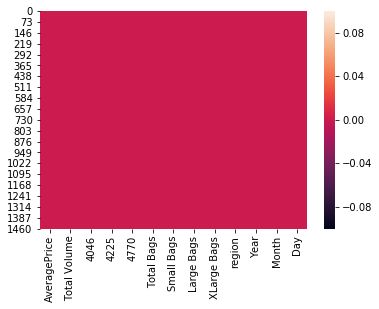

In [20]:
# Plot the heat map of null values

sns.heatmap(avocado_df.isnull())
plt.show()

From the above plot it is very cleary visible that now after removing all the null values we do not have any null values in our data set



In [21]:
# Check the correlation

avocado_df.corr()
avocado_df.corr().style.background_gradient(cmap = 'plasma')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Day
AveragePrice,1,-0.14047,-0.190096,-0.0920841,-0.100567,-0.111597,-0.097682,-0.17748,-0.0482839,0.178683,0.0925888
Total Volume,-0.14047,1,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.00418866,-0.0348568
4046,-0.190096,0.985568,1,0.951952,0.89857,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.0318058
4225,-0.0920841,0.987154,0.951952,1,0.927757,0.951779,0.943988,0.900496,0.504718,-0.00725404,-0.0440081
4770,-0.100567,0.934347,0.89857,0.927757,1,0.926405,0.923607,0.840523,0.646053,0.0292217,-0.0213177
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1,0.997341,0.911336,0.601856,0.0901078,-0.0211366
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1,0.879131,0.6113,0.106382,-0.016462
Large Bags,-0.17748,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1,0.447779,-0.0186784,-0.0465785
XLarge Bags,-0.0482839,0.521717,0.474063,0.504718,0.646053,0.601856,0.6113,0.447779,1,0.218342,0.0193153
Year,0.178683,-0.00418866,-0.040439,-0.00725404,0.0292217,0.0901078,0.106382,-0.0186784,0.218342,1,0.029744


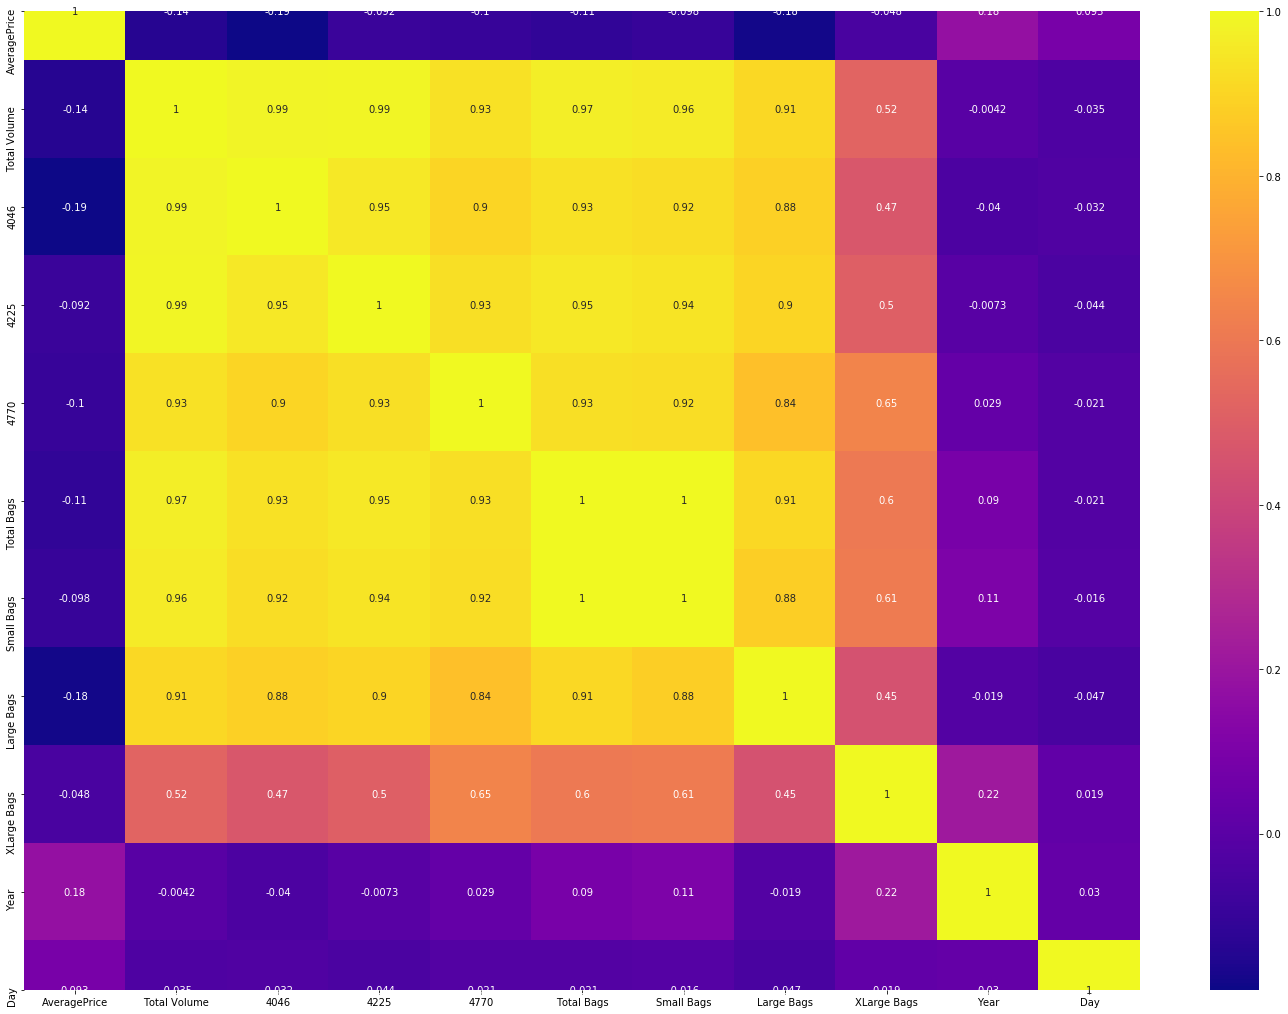

In [22]:
# Check the heat map of correlation

plt.figure(figsize = (25,18))
#sns.set(font_scale=2.5)
#plt.rcParams.update({'font.size': 30})
sns.heatmap(avocado_df.corr(),annot = True,cmap = 'plasma');


Observation:
1. Total volume, Small bags and and total bags are higly correlated
2. Average price and Large, Small bags are higly negative correlated
3. Xlarge bags and region are negatively correlated

In [23]:
# Check the statistics metrics

avocado_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Day
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,15.253790
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,8.965902
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,7.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,15.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,22.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,31.000000



Observations:
1. 1515 values count in each columns confirm that we do not have any missing values in our data set.  
2. Average maximum proce is USD 111 and minimum price is USD 0
3. Total Volume, Total Bag, 4046, 4770, 1225, Small and Large bags have highest standard deviation
4. Total Number of bag are 1516 and min is 0  
5. Average sales in each regoin is 758 bags
6. There are total of 50 regions where avacado's are sold

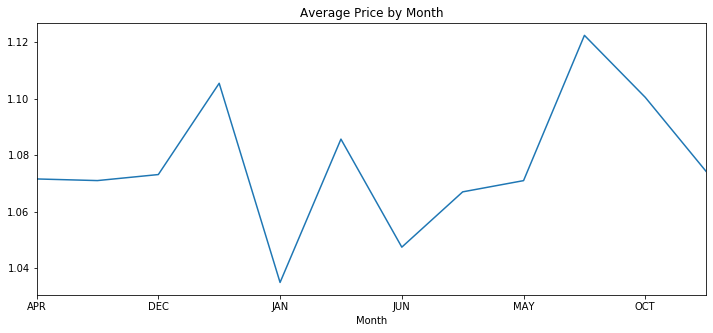

In [24]:
# Check the average price with repect to the month

dategroup = avocado_df.groupby('Month').mean()
plt.figure(figsize = (12,5))
dategroup['AveragePrice'].plot(x = avocado_df.Month)
plt.title('Average Price by Month');

We can observe fron the graph that in the april month there is drop in the avg price of avacado and the then it keep on increasing and decreasing. From july we can observe there is stedy increase in the avg price then again it drops september.



Text(0.5, 1.0, 'Average Price')

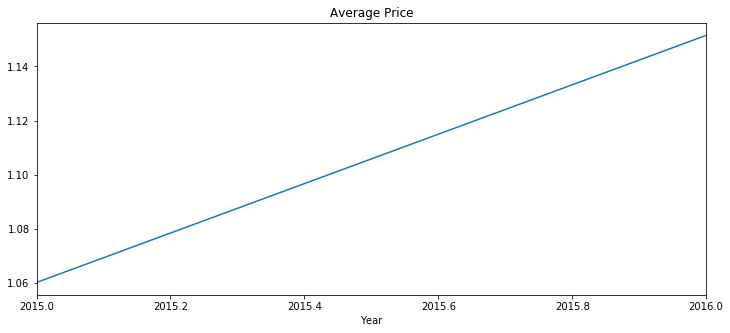

In [25]:
# Check the average price with respect to the year

dategroup = avocado_df.groupby('Year').mean()
plt.figure(figsize = (12,5))
dategroup['AveragePrice'].plot(x = avocado_df.Year)
plt.title('Average Price')

We can observe the avg price has a increased through the years



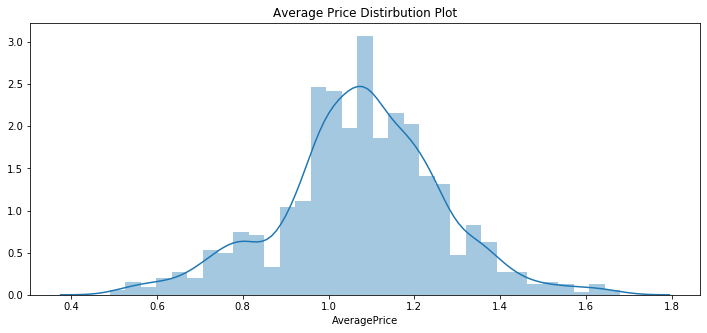

In [26]:
#Check the average price distribution

plt.figure(figsize = (12,5))
plt.title("Average Price Distirbution Plot")
ax = sns.distplot(avocado_df["AveragePrice"])

We can observe that avg price has a normal distribution



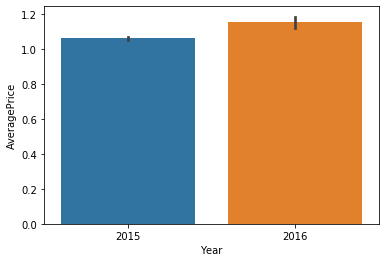

In [27]:
#Check the ratio of avg price and year

sns.barplot(x = "Year" , y = "AveragePrice" ,data = avocado_df)

We can observe the avg price in 2016 has increased as compared to the year 2015



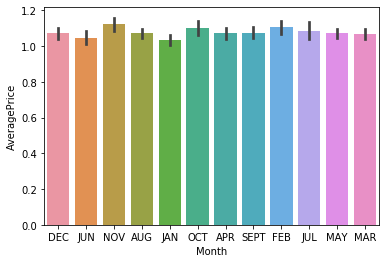

In [28]:
#Check the  ratio of month and price that which year had max average price

sns.barplot(x = "Month" , y = "AveragePrice" ,data = avocado_df)

We can observe that in the november month we hae the highest average price, then followed by october, feburary, july, december and so on



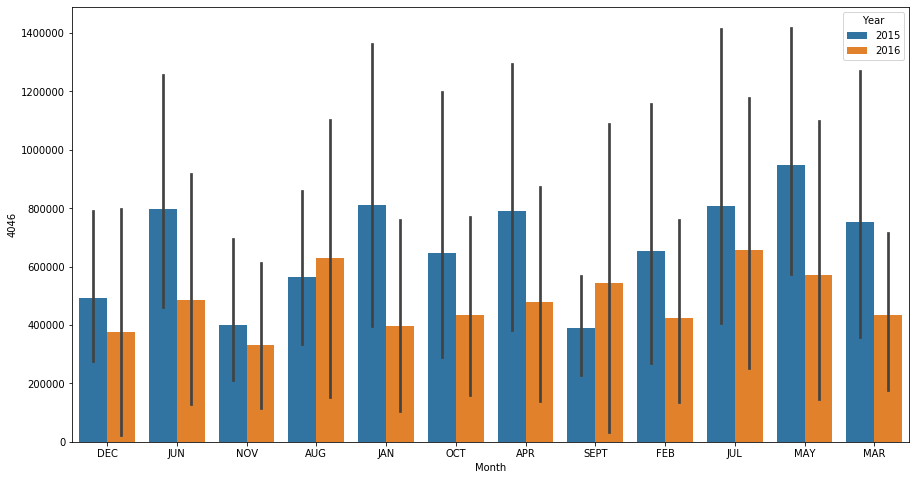

In [29]:
# Check the average price for 4046 

plt.subplots(figsize = (15,8))
sns.barplot(x = avocado_df['Month'], y = avocado_df['4046'], hue = avocado_df['Year'])

We can clearly observe that avg price for 4046 is reduced in the year 2016 as compared to 2015



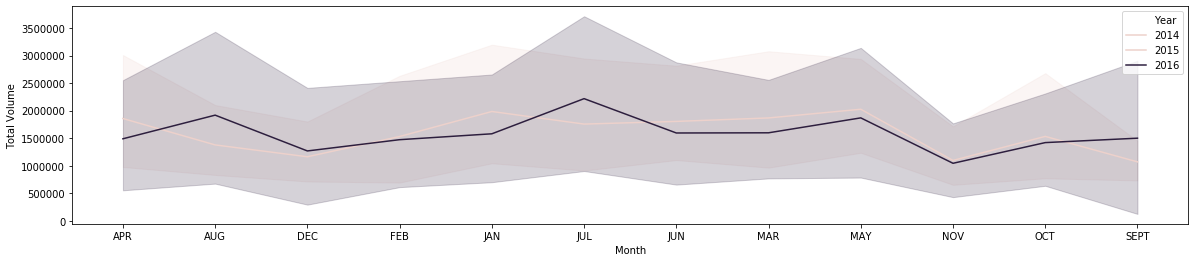

In [30]:
plt.subplots(figsize = (20,4))
sns.lineplot(x = avocado_df['Month'], y = avocado_df['Total Volume'], hue = avocado_df['Year'])

We can observe that sale does not have a linear graph it keeps on increasing and decreasing throughout the year



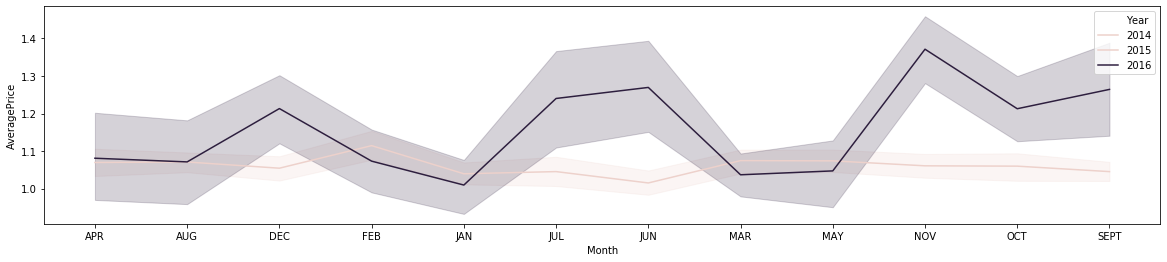

In [31]:
plt.subplots(figsize = (20,4))
sns.lineplot(x = avocado_df['Month'], y = avocado_df['AveragePrice'], hue = avocado_df['Year'])

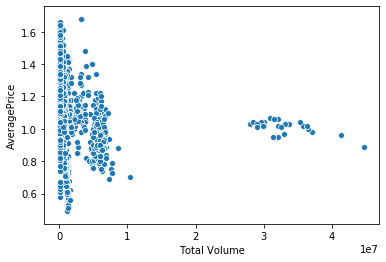

In [32]:
sns.scatterplot(avocado_df['Total Volume'], avocado_df['AveragePrice'])

We can observe that with increase in volume the average price is decreased



Text(0.5, 1.0, 'Avg Price in each region')

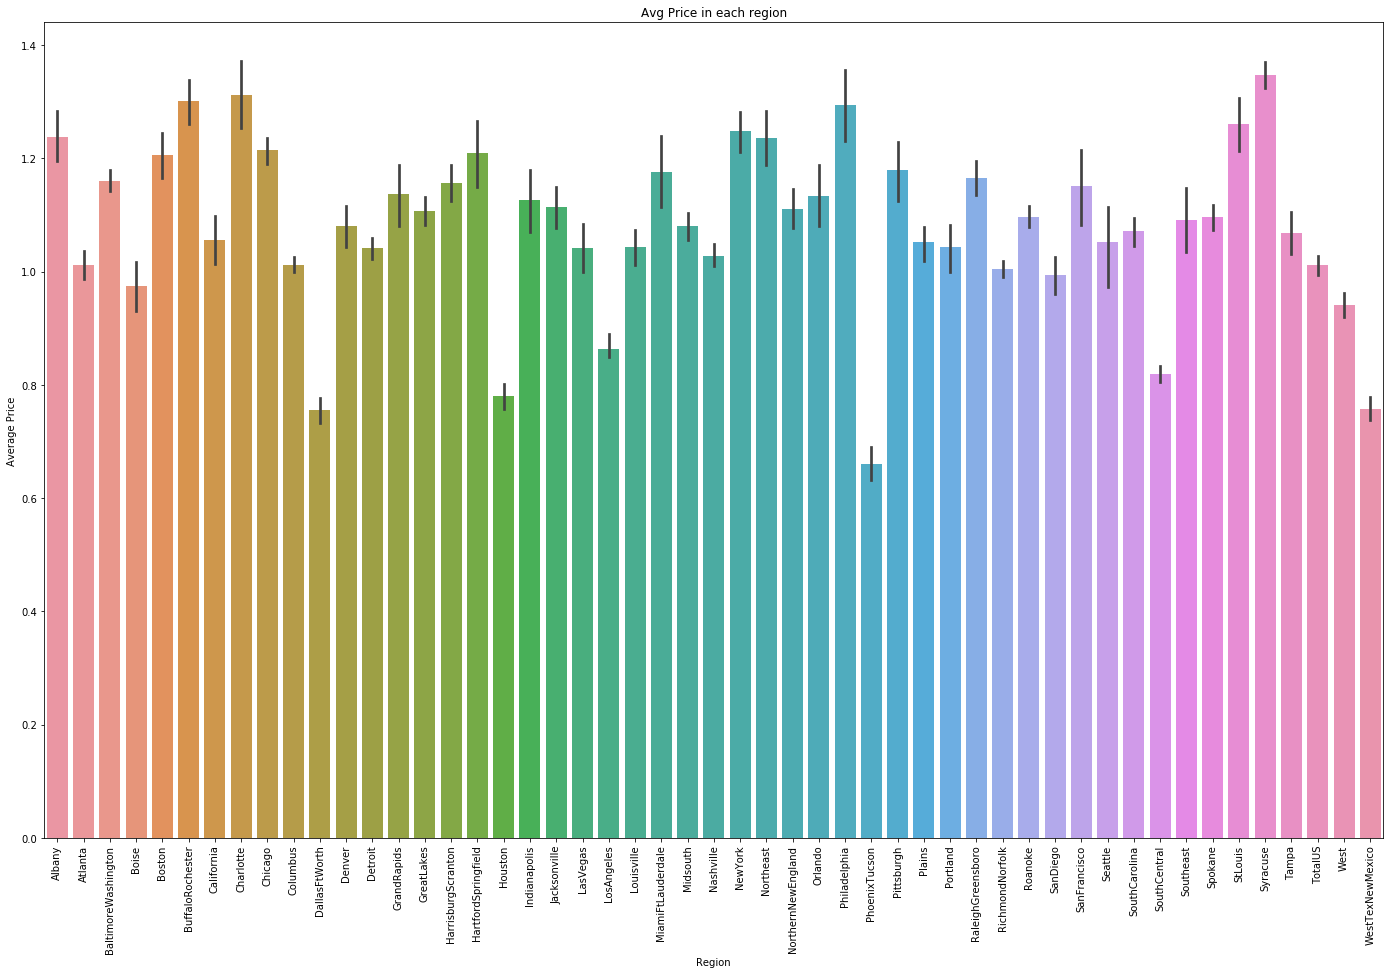

In [33]:
# Check the  avg price in each region

plt.figure(figsize = (24,15))
sns.barplot(x = 'region', y = 'AveragePrice', data = avocado_df)
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Avg Price in each region')

We can observe that syracuse has the highest avg price, followed by Philadephia, St. Louis, New Yok and Norht East



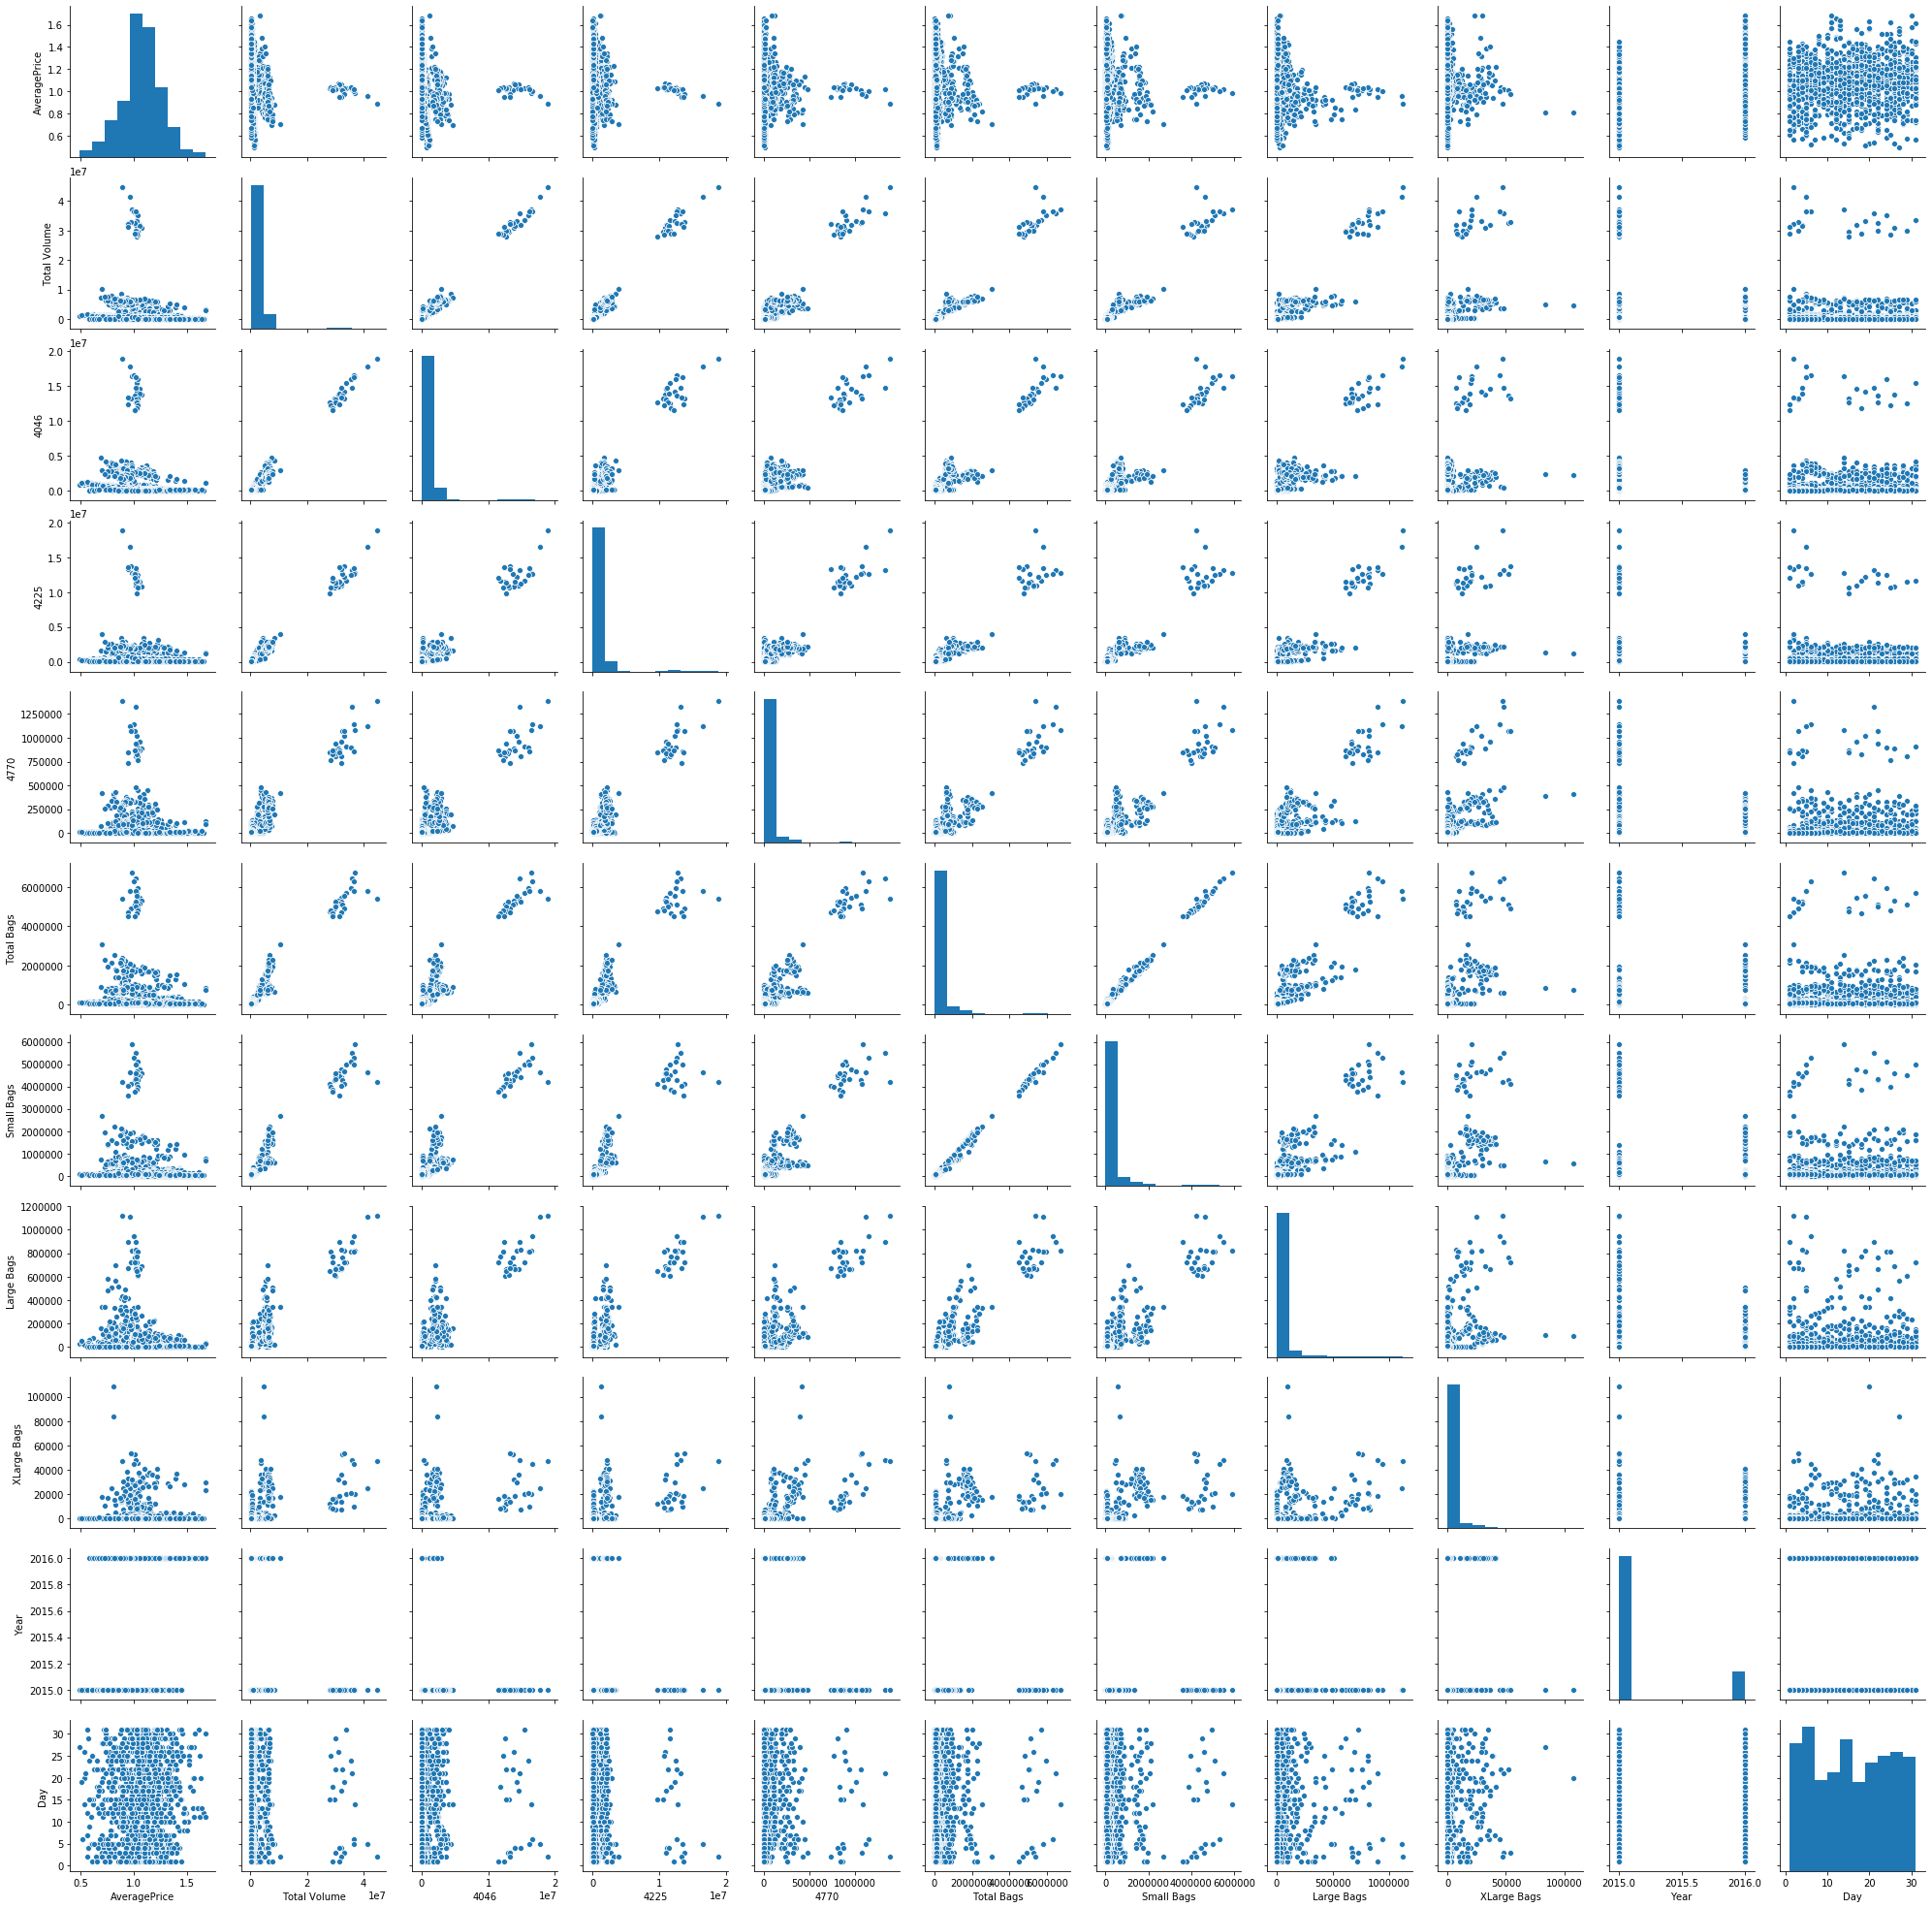

In [34]:
# Plot the pair plot

sns.pairplot(avocado_df)
plt.show()

# Plotting Outliers

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Day                AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

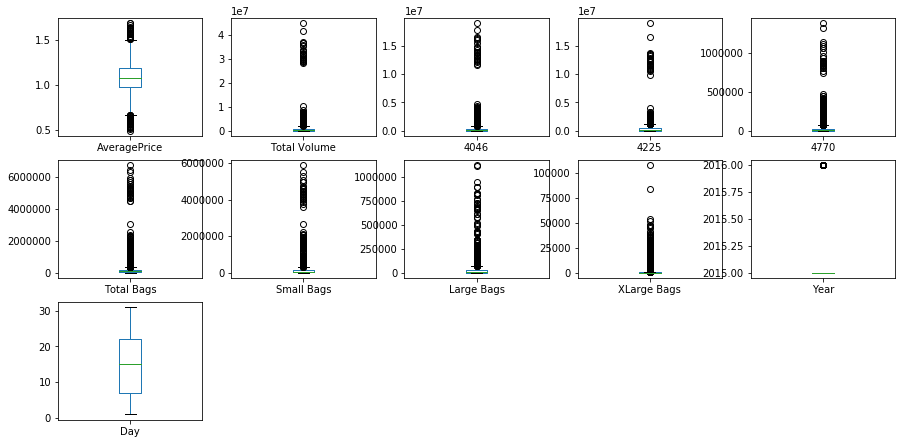

In [35]:
# Plot the boxplot of each column to check the outliers 

avocado_df.plot(kind = 'box', subplots = True, layout = (4,5), figsize = (15,10))

We can see that there are hardly any outliers

# Data Preparation for Model

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(avocado_df.columns)):
    avocado_df[avocado_df.columns[column]]=le.fit_transform(avocado_df[avocado_df.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)
    
mappings

[{0: 0.49,
  1: 0.51,
  2: 0.52,
  3: 0.53,
  4: 0.54,
  5: 0.56,
  6: 0.57,
  7: 0.58,
  8: 0.6,
  9: 0.61,
  10: 0.62,
  11: 0.63,
  12: 0.64,
  13: 0.65,
  14: 0.66,
  15: 0.67,
  16: 0.68,
  17: 0.69,
  18: 0.7,
  19: 0.71,
  20: 0.72,
  21: 0.73,
  22: 0.74,
  23: 0.75,
  24: 0.76,
  25: 0.77,
  26: 0.78,
  27: 0.79,
  28: 0.8,
  29: 0.81,
  30: 0.82,
  31: 0.83,
  32: 0.84,
  33: 0.85,
  34: 0.86,
  35: 0.87,
  36: 0.88,
  37: 0.89,
  38: 0.9,
  39: 0.91,
  40: 0.92,
  41: 0.93,
  42: 0.94,
  43: 0.95,
  44: 0.96,
  45: 0.97,
  46: 0.98,
  47: 0.99,
  48: 1.0,
  49: 1.01,
  50: 1.02,
  51: 1.03,
  52: 1.04,
  53: 1.05,
  54: 1.06,
  55: 1.07,
  56: 1.08,
  57: 1.09,
  58: 1.1,
  59: 1.11,
  60: 1.12,
  61: 1.13,
  62: 1.14,
  63: 1.15,
  64: 1.16,
  65: 1.17,
  66: 1.18,
  67: 1.19,
  68: 1.2,
  69: 1.21,
  70: 1.22,
  71: 1.23,
  72: 1.24,
  73: 1.25,
  74: 1.26,
  75: 1.27,
  76: 1.28,
  77: 1.29,
  78: 1.3,
  79: 1.31,
  80: 1.32,
  81: 1.33,
  82: 1.34,
  83: 1.35,
  84: 1.36

In [37]:
#Check and treat the outliers

from scipy.stats import zscore
z_score = abs(zscore(avocado_df))
print(avocado_df.shape)
avocado_final = avocado_df.loc[(z_score<3).all(axis=1)]
print(avocado_final.shape)

(1517, 13)
(1515, 13)


In [38]:
avocado_df = avocado_final
avocado_df.shape

(1515, 13)

In [39]:
avocado_df.skew()

AveragePrice   -0.146794
Total Volume    0.002269
4046            0.002254
4225            0.002367
4770            0.002863
Total Bags      0.001805
Small Bags      0.001528
Large Bags      0.069310
XLarge Bags     1.028178
region          0.285834
Year            1.839371
Month          -0.016168
Day             0.040842
dtype: float64

In [40]:
# Treat the skewness

for col in avocado_df.columns:
    if avocado_df[col].skew() > 0.55:
        avocado_df[col] = np.log1p(avocado_df[col])

In [41]:
avocado_df.skew()

AveragePrice   -0.146794
Total Volume    0.002269
4046            0.002254
4225            0.002367
4770            0.002863
Total Bags      0.001805
Small Bags      0.001528
Large Bags      0.069310
XLarge Bags     0.236765
region          0.285834
Year            1.839371
Month          -0.016168
Day             0.040842
dtype: float64

# Modelling

# As per our problem statement we will analyse the data set for Classification and Regression

# Regression Method for Continous values

In [42]:
#  Assign the value of x and y for training and testing

x = avocado_df.drop(['AveragePrice'],axis=1)
y = avocado_df['AveragePrice']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [44]:
# Scale the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)
x_sc = pd.DataFrame(x_sc,columns = x.columns)

# Let's start with Regressor

In [45]:
# Import metrics and regressors (sklearn libraries)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [46]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()
GBC = GradientBoostingRegressor()

In [47]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))

In [48]:
# Model using multiple Algorithms 

model = [DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(42,80):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r_state,test_size = 0.20)
    for i in model:
        i.fit(x_train,y_train)
        pre = i.predict(x_test)
        r2_sc = r2_score(y_test,pre)
        print(f"R2 score corresponds to random state {r_state} is {r2_sc}")
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print(f"\n\nMax R2 score corresponds to random state {final_state} is {max_r2_score} and the model is {final_model}")

R2 score corresponds to random state 42 is 0.6531138008040749
R2 score corresponds to random state 42 is 0.8244846891827706
R2 score corresponds to random state 42 is 0.7828759294165142
R2 score corresponds to random state 42 is 0.6386846234355986
R2 score corresponds to random state 42 is 0.38301253520056866
R2 score corresponds to random state 42 is 0.7485741539184609
R2 score corresponds to random state 43 is 0.7172367192863662
R2 score corresponds to random state 43 is 0.8469000171440838
R2 score corresponds to random state 43 is 0.8014390493229401
R2 score corresponds to random state 43 is 0.6354189247919014
R2 score corresponds to random state 43 is 0.33761864597330005
R2 score corresponds to random state 43 is 0.7728390620462524
R2 score corresponds to random state 44 is 0.6424139304939454
R2 score corresponds to random state 44 is 0.7960919275087629
R2 score corresponds to random state 44 is 0.7857776083773864
R2 score corresponds to random state 44 is 0.5691696381358972
R2 sco

R2 score corresponds to random state 64 is 0.8192572275725676
R2 score corresponds to random state 64 is 0.8244529681038866
R2 score corresponds to random state 64 is 0.5532930282958597
R2 score corresponds to random state 64 is 0.3466027542109399
R2 score corresponds to random state 64 is 0.7234749175816007
R2 score corresponds to random state 65 is 0.5625378540244104
R2 score corresponds to random state 65 is 0.8043069026219645
R2 score corresponds to random state 65 is 0.7871720023523306
R2 score corresponds to random state 65 is 0.6235866065321634
R2 score corresponds to random state 65 is 0.392209417756906
R2 score corresponds to random state 65 is 0.7442694824328839
R2 score corresponds to random state 66 is 0.6199902440490797
R2 score corresponds to random state 66 is 0.8175798184295541
R2 score corresponds to random state 66 is 0.7763277845707067
R2 score corresponds to random state 66 is 0.5858081080668864
R2 score corresponds to random state 66 is 0.4091228500958065
R2 score 

Max R2 score corresponds to random state 47 is 0.8590362750041703 and the model is RandomForestRegressor()


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = 47, shuffle = True)

In [50]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
RMAE = []

for name,model in models:
    
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    
    sc = cross_val_score(model, x, y, cv = kf, scoring = "r2").mean()
    print("Cross val score = ", sc)
    cvs.append(sc)
    
    mse = mean_squared_error(y_test, pre)
    print("Mean Squared error: {}".format(mse))
    MSE.append(mse)
    
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error: {}".format(mae))
    MAE.append(mae)
    
    rmae = np.sqrt(mean_absolute_error(y_test,pre))
    print("Root Mean absolute error: {}".format(rmae))
    RMAE.append(rmae)
    
    print("\n____________________________________________________________________\n")

LinearRegression()
R2 Score =  0.4523091218341482
Cross val score =  0.3606911981344706
Mean Squared error: 193.07429894657895
Mean absolute error: 10.87139879682673
Root Mean absolute error: 3.2971804313423205

____________________________________________________________________

Ridge()
R2 Score =  0.45231147102075564
Cross val score =  0.36069845407774037
Mean Squared error: 193.07347080140545
Mean absolute error: 10.871478858254301
Root Mean absolute error: 3.2971925722126545

____________________________________________________________________

Lasso()
R2 Score =  0.458199405046555
Cross val score =  0.36045520234312906
Mean Squared error: 190.99783145885888
Mean absolute error: 10.857525858705246
Root Mean absolute error: 3.2950760019619043

____________________________________________________________________

KNeighborsRegressor()
R2 Score =  0.8352371235798193
Cross val score =  0.7897871068189732
Mean Squared error: 58.08290429042905
Mean absolute error: 5.592079207920793
Root

In [51]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE, "Root Mean Absolute Error": RMAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error,Root Mean Absolute Error
0,LinearRegression,0.452309,0.360691,193.074299,10.871399,3.297180
1,Ridge,0.452311,0.360698,193.073471,10.871479,3.297193
2,Lasso,0.458199,0.360455,190.997831,10.857526,3.295076
3,KNeighborsRegressor,0.835237,0.789787,58.082904,5.592079,2.364758
4,SVR,0.436350,0.396375,198.700435,10.989134,3.314986
5,DecisionTreeRegressor,0.724102,0.634469,97.260726,7.194719,2.682297
6,RandomForestRegressor,0.843145,0.818100,55.295079,5.543234,2.354407
7,AdaBoostRegressor,0.639259,0.609528,127.169937,9.336312,3.055538
8,GradientBoostingRegressor,0.754169,0.748099,86.661245,7.220445,2.687089


In [52]:
# Parameters used by our current RandomForestRegressor

RFC = RandomForestRegressor()
from pprint import pprint
print('Parameters currently in use:\n')
pprint(RFC.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# Hypertuning

In [53]:
# Hypertune our model with GridSearchCV

from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50],
             }
grid = GridSearchCV(estimator = RFC, param_grid = parameters,
                    cv = 3, verbose = 2, n_jobs = -1)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

Fitting 3 folds for each of 900 candidates, totalling 2700 fits
GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 50]},
             verbose=2)
0.81045297116249
50
{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [54]:
# Re-train the regressor model with the best parameters

RFC = RandomForestRegressor(min_samples_leaf = 1, min_samples_split = 2,
                            max_features = 'sqrt', n_estimators = 50)
RFC.fit(x_train,y_train)
print("Score = ",RFC.score(x_train,y_train))
predrfc = RFC.predict(x_test)
print('__________'*4, '\n')
print('Mean Absolute Error= ', mean_absolute_error(y_test,predrfc))
print('Mean squared Error= ', mean_squared_error(y_test,predrfc))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,predrfc)))
print('__________'*4, '\n')
print('R2 Score=',r2_score(y_test,predrfc))

Score =  0.9730037890874284
________________________________________ 

Mean Absolute Error=  5.492607260726071
Mean squared Error=  52.004838283828384
Root Mean Absolute Error=  2.343631212611334
________________________________________ 

R2 Score= 0.8524786794309489


Text(0, 0.5, 'Predicted_Y')

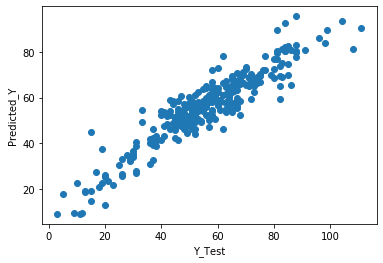

In [55]:
# Check the difference between actual and predicted value using graph

plt.scatter(x = y_test, y = predrfc)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

# Random Forest Regressor has the highest R2 score ie around 85%

# Classification Model 

Now we are taking region as indepependent variable and predicting using classificaton method

In [56]:
# Assign the value of x and y for training and testing phase

x_c = avocado_df.drop(columns=['region','Day','Total Bags'])
y_c = avocado_df[["region"]]
print(x_c.shape)
print(y_c.shape)

(1515, 10)
(1515, 1)


In [57]:
# Scale the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns = x_c.columns)

In [58]:
from sklearn.model_selection import train_test_split
xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,test_size=0.2,random_state=0)

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(yc_test, yc_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(yc_test, yc_predict)) 
    
    print("\nClassification Report: \n", 
    classification_report(yc_test, yc_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(yc_test,yc_predict)*100:0.2f}%")

In [60]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {log.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {log.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 89.19%
Accuracy of Test Dataset: 87.13%


In [61]:
y_predict=log.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[49 10  0 31 31  9 22 26 19 19  7  6 48  0  9 29 17 19  0  1 39 16 41 17
 45  9  1 34 36 49  1 17  6 38 42  6 42 42 41 30 11 18 32 23 19 43 28 25
  4 19 27 22 44 12 14 50  3  3 26  9 44  2 41 45 41 39  0 17 44 47  4 19
 46 41 37  4 26 32  6  4 50 12 35  0 17  0 13 46 32 26 47  0 46  9 48 12
  1  3 44 27  3 13  1  5 26  5  7  2 31 29  5 49 14  6 42 12 29  5  4 44
 43  3  3  0 47 42 38  3 19 11 28 44 38 17 28  9  2 38 48  0 31 36 44 23
  1  6 42 16  2 31 38 31 49 16 46  6 31  5  5 10 32 46  5 34 47 41 25  8
  5 19 37  5  0 31 16  0 50 44 38  6  2 14 39 45 24  1 31  6 35 11 26 34
  4  0  6 20 49 44 24 28  3 19 27 25 17 18 16 19  7  0 45  1 45  2 11  3
 19  2 37  7 44 15  4  3 45  1 18  0  4  0 32  2 45  5  2 39 42 41 29 38
  0 22  7 45  7 34 23  6  8  2  4 31 26 47 34 31 16  4  8 22  7 23 48 27
 20 38 15  8  5  7 47 44 43 17 25  3 32 26 39 23 41 22 13 38 31 31 28 42
 48 26 22  6  4  4  4 12 12  4 49 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0  9  0 ..

In [62]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
tree.fit(xc_train, yc_train)
print(f"Accuracy of Train Dataset: {tree.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 22.85%
Accuracy of Test Dataset: 18.81%


In [63]:
y_predict=tree.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[49  2  0  2  2  2  0  2  2  2  2  6 48  0  2  2  2  2  0  2  2  0  2  2
  2  2  2  6  2  2  2  2  6  2 49  6  6 42  2  2  2  0  0  2  2  2  0  2
  0  3  2  0  2  2  2  2  3  3  2  2  2  2  2  2  2  2  0  2  2  2  0  2
  0  2  2  0  2  0  6  0  2  2  2  0  2  0  0  0  0  2  2  0  0  2 48  2
  2  2  2  2  3  0  2  0  2  0  2  2  2  2  0  6  2  6 42  2  2  0  0  2
  2  2  2  0  2 42  2  2  2  2  0  2  2  2  0  2  2  2 48  0  2  0  2  2
  2  6 42  0  2  2  2  2 49  0  0  6  2  0  0  2  0  0  0  2  2  2  3  2
  0  2  2  0  0  2  0  0  2  2  2  2  2  2  2  2  2  2  2  6  2  2  2  2
  0  0  6  2 49  2  2  0  2  2  2  2  2  0  0  2  2  0  2  2  2  2  2  2
  2  2  2  2  2  2  0  3  2  2  0  0  0  0  0  2  2  0  2  2  2  2  2  2
  0  0  2  2  2  2  2  6  2  2  0  2  2  2  2  2  0  0  2  0  2  2 49 49
  2  2  2  2  0  2  2  2  2  2  2  3  0  2  2  2  2  0  0  2  2  2  0 49
  6  2  0  6  0  0  2  2  2  0 49  2  2  2  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0  0 11 ..

In [64]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {svm_rbf.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {svm_rbf.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 77.06%
Accuracy of Test Dataset: 76.90%


In [65]:
y_predict=svm_rbf.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[ 6 31  0 31 31  9 22 26 19 19  7  6  6  0  9  1 17 19  0  1 39 28 41 17
 37  9  1  6 36 11  1 17  6 38  6  6  6 42 41 30 11 18 22  1 19 42 28 25
 28 19 27 22  3 12  6 31  3  3 26  9  3  2 41 37 41 15  0 31 44  1  4 19
 46 41 37  4 26 22  6  4 50 12  7  0 31  0 13  0 22 26 47  0 46  9  6 12
  1  3 44 27  3 13  1  5 26  5  7  2 31 29  5  6  7  6 42 12 29  5  4 44
 42  3  3  0 47 42 38  3 19 11  5 44 38 31  0  9  2 38  6  0 31 44 44  1
  1  6 42 28  2 31 38 31  6 28 46  6 31  5  5 31 22  5  0 34 47 41  9  2
  5 19 37  5  0 31 28  0 50 44 38  6  2  6 39 37 24  1 31  6 12 11 26 34
  4  0  6 36  6 44  6  4  3 19 27 25 17 18 28 19  7  0 45  1 45  2 11  3
 19  2 37  7 44 15  4  3 37  1 18  0  2  0 22  2 45  5  2 34 42 41 29 50
  0 22  7 37  3 34 47  6  8  2  4 31 26 47 34 31 28  4  2 22  7  1  6 27
 36 38 15  8  5  7 47 44 42 31 25  3 22 26 34  1 41 22 13 38 31 31 28  6
  6 26 22  6  4  4  2 12 12  4  6 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0 11  0 ..

In [66]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {forest.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {forest.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 96.37%


In [67]:
y_predict=forest.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 10  0 31 10  9 22 26 19 19  7  6 48  0  9  1 17 19  0  1 39 16 41 17
 45  9  1  6 36 11  1 17  6 38 42 42  6 42 41 30 11 18 22 47 19 43 28 25
 28  3 27 22 44 12 14 31  3  3 26  9  3  2 41 45 41 15  0 17 44 47  4 19
 46 41 37  4 26 32  6 28 50 12  7  0 17  0 13 46 22 26 47  0 46  9 48 12
 29  3 44 27  3 13  1  5 26  5  7  2 10 29  5  6  7  6 42 12 29  5  4 44
 43  3  3  0 47 42 38  3 19 11  5 44 38 17  5  9  2 38 48  0 10  0 44 23
  1  6 42 16  2 31 38 31 49 16 46  6 31  5  5 10 32  5  5 34 47 41  3  8
  5 19 37  5  0 10 16  0 50 44 38  6  2 14 39 45 24  1 31  6 35 11 26 34
  4  0  6 20 49 44 24  4  3 19 27 25 17 18 16 19  7  0 45  1 45  2 11  3
 19  2 37  7 44 15  4  3 45  1 18  0  4  0 32  2 45  5  2 39 21 41 29 38
  0 22  7 45  3 34 23  6  8  2  4 31 26 47 34 31 16  4  8 22  7 29 49 27
 20 34 15  8  5  7 23 44 43 17 25  3 22 26 31 23 41 22 13 38 31 10 28 42
  6 26 22  6 28  4  4 12 12  4 49 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0  8  0 .

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {gbc.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gbc.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 92.41%


In [69]:
y_predict=gbc.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 10  0 31 31  9 22 26 19 19  7  6 48  5  9  1 17 19  0  1 39 16 41 17
 45  9  1  6 36 11  1 17  6 38 42 42  6 42 41 30 11 18 22  1 19 24 47 25
 28 19 27 22 44 12 14 31  3  3 26  9  3  2 41 45 41 36  0 17 44 47  4 19
 46 41 37  4 11 32  6 28 50 12  7  0 17  0 13 46 22 26 23  0 46  9 48 12
  1  3 44 27  3 13  1  5 26  5  7  2 10 29  5  6  7  6 42 12 29  5  4 44
 42  3  3  0 47 42 38  3 19 38  5 44 38 17  5  9  2 38 48  0 10 44 44 23
  1  6 42 16  2 31 38 31 49 16 46  6 31  5  5 10 32  5  5 34 47 38 25  8
  5 19 37  5  0 10 16  0 50 44 38  6  2 14 39 45 24  1 31  6 35 11 26 34
  4  0  6 20 49 44 24  4 44 19 27 41 17 18 16 19  7  0 45  1 47  2 11  3
 19  2 37  7 44 15  4  3 45  1 18  0  4  0 32  2 47  5  2 39 21 41 29 34
  0 22  7 47  3 34 23  6  8  2  4 31 26 47 34 31 38  4  8 22  7  1 49 27
 36 34 15  8  5  7 23 44 42 17 25  3 18 26 31 23 41 22 13 38 31 10 28 42
  6 26 22  6 28 28  7 12 12  4 49 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0 11  0 .

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
tree_ex=ExtraTreesClassifier(criterion = "entropy", random_state =100,max_depth=3, min_samples_leaf=5)
tree_ex.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {tree_ex.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree_ex.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 54.04%
Accuracy of Test Dataset: 54.13%


In [71]:
y_predict=tree_ex.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[ 6 31  0 31 31  9 22 26 19 19  3  6  6  0  9  1 31 19  0  1  2  0 38 31
  3  9  1  6  3 26  1 31  6 38  6  6  6  6  1  4 31  9 22  1 19  6  0  9
  0 19 26 22 44 12  6 31  3  3 26  9  3  2  1  3  1  0  0 31 44  1  4 19
  0  9  0  4 26  0  6  4 31 12  7  0 31  0  5  0 22 26  1  0  0  9  6 12
  1  3 44 26  3  0  1  0 26  5  7  2 31 19  5  6  3  6 42 12  1  5  4 44
 42  3  3  0 47 42 38  3 19  2  5 44 38 31  5  9  2 38  6  0 31  0 44  1
  1  6 42  0  2 31 38 31  6  0  0  6 31  5  0  2  0  5  0  2 47 38  9  2
  5 19  0  5  0 31  4  0 31 44 38  6  2  6  2  3  6  1 31  6  2 31 26 12
  4  0  6  3  6  0  6  4  3 19 26  9 31 22 28 19  3  0  3  1  1  2  2  3
  1  2  0  7 44  0  4  3  3  1  9  0  4  0  0  2  1  0  2  2  6 12 19  1
  0 22  3  0  3 34  1  6  2  2  4 31 26  1  2 31  0  4  2 22  7  1  6 26
  3  2  0  2  5  7  1 44 42 31  9  3 22 26 31  1  1 22  9  1 31 31  4  6
  6 26 22  6  4  4  4 12 12  4  6 31 38 12  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0 11  0 .

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {knn.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {knn.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 96.70%
Accuracy of Test Dataset: 94.39%


In [73]:
y_predict=knn.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 10  0 31 10  9 22 26 19 19  7  6 48  0  9 29 17 19  0  1 39 16 41 17
 45  9  1  6 36 11  1 17  6 38 42  6  6 42 41 30 11 18 32 47 19 43 28 25
 28 19 27 22 44 12 14 31  3  3 26  9  3  2 41 45 41 15  0 17 44 47  4 19
 46 41 37  4 26 32  6 28 50 12  7  0 17  0 13 46 22 26 23  0 46  9 48 12
  1  3 44 27  3 13  1  5 26  5  7  2 10 29  5 49  7  6 42 12 29  5  4 44
 43  3  3  0 47 42 38  3 19 11  5 44 38 17  5  9  2 38 48  0 10 44 44 23
  1  6 42 16  2 31 38 31 49 16 46  6 31  5  5 10 32  5  5 34 47 41 25  8
  5 19 37  5  0 10 16  0 50 44 38  6  2 14 39 45 24  1 31  6 35 11 26 34
  2  0  6 20 49 44 24  4  3 19 27 25 17 18 16 19  7  0 45  1 45  2 11  3
 19  2 37  7 44 15  4  3 45  1 18  0  8  0 32  2 45  5  2 39 24 41 29 38
  0 22  7 45  7 34 23  6  8  2  4 31 26 47 34 10 16  4  8 22  7  1 49 27
 20 38 15  8  5  7 23 44 43 31 25  3 32 26 34 23 41 22 13 38 31 10 28 42
  6 26 22  6  4  4  4 12 12  4 49 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0 10  0 .

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {gnb.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gnb.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 94.72%
Accuracy of Test Dataset: 88.78%


In [75]:
y_predict=gnb.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49 10  0 31 10  9 22 26 19 19  7  6 48  5  9 47 17 19  0 29 39 16 41 17
 45  9  1  6 36 11  1 17  6 38 42 42  6 42 41 30 11 18 22 29 19 43 16 25
 28 19 27 22 44 12 14 50  3  3 26  9  3  2 41 47 41 15  0  1 44 47  4 19
 46 41 37  4 26 32  6 28 50 12 35  0 17  0 13 46 22 26 47  0 46  9 48 12
 29  3 44 27  3 13  1  5 26  5 35  2 10 29  5  6  7  6 42 12 29  5 28 44
 43  3  3  0 47 42 38  3 19 11  5 44 38 17  5  9  2 38 48  0 10 44 44 23
 29  6 42 16  2 31 38 31 49 16 46  6 17  5  5 10 32  5  5 40 47 41  9  8
  5 19 37  5  0 10 28  0 50 44 38  6  2 14 39 45 24  1 50  6 35 11 26 34
  4  0  6 20 49 44 24  4 44 19 27 25 17 18 16 19  7  0 47  1  1  2 11  3
 29  2 37 35 44 15 28  3 45  1 18  0  4  0 32  2 45  5  2 39 42 41 29 34
  0 22  7 45  3 34 23  6  8  2  4 10 26 47 34 17 16  4  8 22 35 29 49 27
 20 34 15  8  5 35 23 44 31 17 25  3 32 26 50 23 41 22 13 38 38 10 28 42
  6 26 22  6 28  4  4 12 12  4 49 31 38 34  2]

Confusion Matrix: 
 [[15  0  0 ...  0  0  0]
 [ 0  6  0 .

In [76]:
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier()
adb.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {adb.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {adb.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 14.36%
Accuracy of Test Dataset: 12.87%


In [77]:
y_predict=adb.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[49  2  4  2  2  2  4  2  2  2  2 49  6  4  2  2  2  2  4  2  2  4  2  2
  2  2  2 49  2  2  2  2  6  2 49 49 49 49  2  2  2  4  4  2  2 43  4  2
  4  2  2  4  2  2  2  2  2  2  2  2  2  2  2  2  2  2  4  2  2  2  4  2
  4  2  2  4  2  4 49  4  2  2  2  4  2  4  4  4  4  2  2  4  4  2  6  2
  2  2  2  2  2  4  2  4  2  4  2  2  2  2  4  6  2  6 49  2  2  4  4  2
 43  2  2  4  2 49  2  2  2  2  4  2  2  2  4  2  2  2  6  4  2  4  2  2
  2 49 49  4  2  2  2  2 49  4  4  6  2  4  4  2  4  4  4  2  2  2  2  2
  4  2  2  4  4  2  4  4  2  2  2  2  2  2  2  2  2  2  2  6  2  2  2  2
  4  4  6  2 49  2  2  4  2  2  2  2  2  4  4  2  2  4  2  2  2  2  2  2
  2  2  2  2  2  2  4  2  2  2  4  4  4  4  4  2  2  4  2  2 43  2  2  2
  4  4  2  2  2  2  2  6  2  2  4  2  2  2  2  2  4  4  2  4  2  2 49 27
  2  2  2  2  4  2  2  2 43  2  2  2  4  2  2  2  2  4  4  2  2  2  4 49
  6  2  4 49  4  4  2  2  2  4 49  2  2  2  2]

Confusion Matrix: 
 [[ 0  0  0 ...  0  0  0]
 [ 0  0 11 .

In [78]:
models=pd.DataFrame({'Model':['Logistics Regression','SVM_rbf','Decision Tree','Random Forest','Gradient Boosting','Extra Trees','KNeighbors','GaussianNB','AdaBoost'],
                     'Trained Accuracy':[(log.score(xc_train,yc_train)),svm_rbf.score(xc_train,yc_train),tree.score(xc_train,yc_train),forest.score(xc_train,yc_train),gbc.score(xc_train,yc_train),tree_ex.score(xc_train,yc_train),knn.score(xc_train,yc_train),gnb.score(xc_train,yc_train),adb.score(xc_train,yc_train)],
                     'Test Accuracy':[(log.score(xc_test,yc_test)),svm_rbf.score(xc_test,yc_test),tree.score(xc_test,yc_test),forest.score(xc_test,yc_test),gbc.score(xc_test,yc_test),tree_ex.score(xc_test,yc_test),knn.score(xc_test,yc_test),gnb.score(xc_test,yc_test),adb.score(xc_test,yc_test)]})

models.sort_values(by = 'Trained Accuracy', ascending = True)

,Model,Trained Accuracy,Test Accuracy
8,AdaBoost,0.143564,0.128713
2,Decision Tree,0.228548,0.188119
5,Extra Trees,0.540429,0.541254
1,SVM_rbf,0.770627,0.768977
0,Logistics Regression,0.891914,0.871287
7,GaussianNB,0.947195,0.887789
6,KNeighbors,0.966997,0.943894
3,Random Forest,1.000000,0.963696
4,Gradient Boosting,1.000000,0.924092


In [79]:
# Check the cross validate for our models

from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10)
models=[('Logistic Regression', log), ('Support Vector Machine (rbf)', svm_rbf),('Decision Tree',tree),
        ('Random Forest',forest),('GradientBoostingClassifier', gbc),('ExtraTreesClassifier', tree_ex),('KNeighborsClassifier', knn),
       ('GaussianNB', gnb),('AdaBoostClassifier', adb)]

for model in models:
    results = model_selection.cross_val_score(model[1],xc_train,yc_train,cv=kfold,scoring = 'accuracy')
    print(f"Cross validated Accuracy of {model[0]} : {results.mean()*100:.2f}%")

Cross validated Accuracy of Logistic Regression : 84.74%
Cross validated Accuracy of Support Vector Machine (rbf) : 72.28%
Cross validated Accuracy of Decision Tree : 20.72%
Cross validated Accuracy of Random Forest : 95.46%
Cross validated Accuracy of GradientBoostingClassifier : 87.12%
Cross validated Accuracy of ExtraTreesClassifier : 51.16%
Cross validated Accuracy of KNeighborsClassifier : 92.99%
Cross validated Accuracy of GaussianNB : 91.50%
Cross validated Accuracy of AdaBoostClassifier : 14.85%


In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
classification_models = {
    'KNeighboursClassfier': knn,
    'DecisionTreeClassifier': tree,
    'Support Vector Machine (rbf)': svm_rbf,
    'Random Forest':forest,
    'GradientBoostingClassifier':gbc,
    'ExtraTreesClassifier':tree_ex,
    'GaussianNB':gnb,
    'AdaBoostClassifier':adb    
    
}

regression_models = {
    'LogisticRegression': log
}

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


for name, model in classification_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(xc_train, yc_train)
    y_pred = pipeline.predict(xc_test)
    
    print('{} : {}'.format(name, accuracy_score(yc_test, y_pred)*100))

KNeighboursClassfier : 87.12871287128714
DecisionTreeClassifier : 18.81188118811881
Support Vector Machine (rbf) : 87.45874587458746
Random Forest : 97.02970297029702
GradientBoostingClassifier : 91.74917491749174
ExtraTreesClassifier : 54.12541254125413
GaussianNB : 85.8085808580858
AdaBoostClassifier : 12.871287128712872


In [82]:
for name, model in regression_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(xc_train, yc_train)
    y_pred = pipeline.predict(xc_test)
    
    print('{}\t{}'.format(name, accuracy_score(yc_test, y_pred)))

LogisticRegression	0.8976897689768977


# Conclusion

# Random Forest is the best model with an accuracy of 96.69%

In [83]:
# Import library to save model
import joblib

# Save the model as sav in a file
joblib.dump(model,'avocado-price.sav')

['avocado-price.sav']

# Conclusion:

After analyzing and visualizing the data, we came up with some insights:

Dallas/Ft. Worth, Houston, and South Central seem to have cheaper avocado prices compared to other locations in the U.S. while New York, Hartfold/Springfield, and San Francisco have more expensive avocado prices. Phoenix/Tucson also has low prices for conventional avocados, but their organic avocados are pretty expensive. We can conclude that Dallas/Ft. Worth, Houston, and South Central are the best places to live if you don't want to go bankrupt from buying avocados

Avocado prices vary over time. Sometimes the prices spike and other times their prices dip low.

The number of avocados being bought over time is increasing. Even though both organic and conventional avocado consumption are increasing, organic avocados seem to be having a more consistent and higher increase in consumption than conventional avocados.

When plotting avocado prices vs number of avocados bought, it looks like less avocados are bought when the prices are high. However, we cannot accurately predict how many avocados are bought based solely on the price.

Overall, it seems like avocados are not getting any less popular. However, if we want to predict how many avocados will be bought, we need to take into consideration more parameters than just the price of the avocados.